Proyecto de Análisis con DASK sobre los sismos en

Ignacio Castillo Vega
Isaac Castillo Vega
Sebastián Alvarado
Tanisha Miranda

In [1]:
import dask
import dask.dataframe as dd

# Ruta al archivo CSV
csv_path = "/work/ulead-013/earthquakes/data/katalog_gempa.csv"

# Leer el CSV con Dask (no carga todo en memoria)
df = dd.read_csv(csv_path)

# Ver columnas disponibles y primeras filas
print("Columnas del DataFrame:")
print(df.columns)

print("\nPrimeras filas:")
df.head()


/usr/local/lib/python3.9/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Columnas del DataFrame:
Index(['tgl', 'ot', 'lat', 'lon', 'depth', 'mag', 'remark', 'strike1', 'dip1',
       'rake1', 'strike2', 'dip2', 'rake2'],
      dtype='object')

Primeras filas:


,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


Top 10 lugares con más sismos (mag ≥ 4.0):
remark
Banda Sea                         4055
Northern Molucca Sea              1985
Minahassa Peninsula - Sulawesi    1903
Southern Sumatra - Indonesia      1888
Talaud Islands - Indonesia        1774
Halmahera - Indonesia             1553
Irian Jaya Region - Indonesia     1550
Northern Sumatra - Indonesia      1433
Java - Indonesia                  1319
Sulawesi - Indonesia              1109
dtype: int64


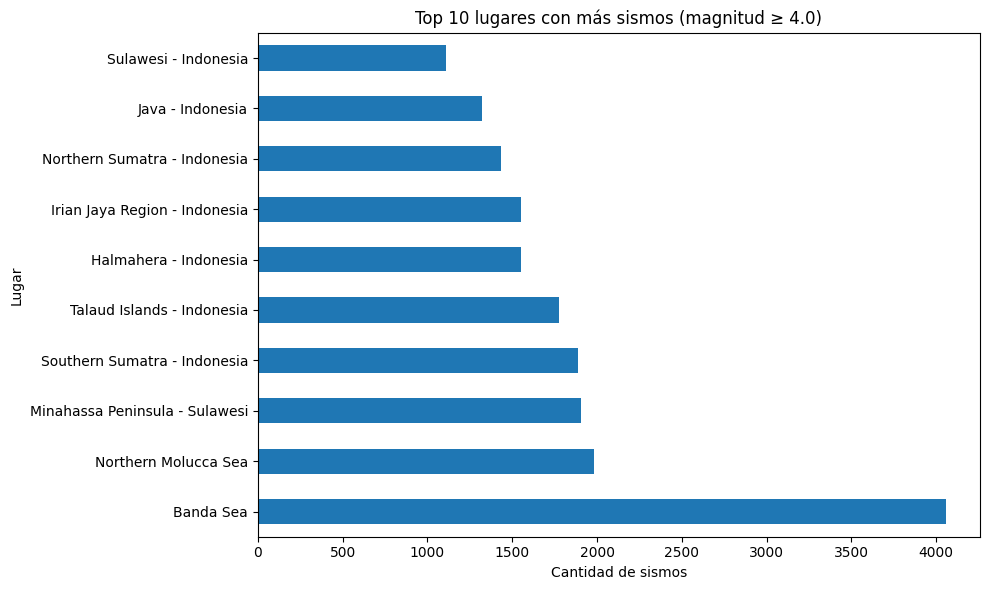

In [2]:
import matplotlib.pyplot as plt

# 1. Filtrar eventos con magnitud mayor o igual a 4.0
df_filtrado = df[df['mag'] >= 4.0]

# 2. Agrupar por lugar (remark) y contar ocurrencias
actividad_por_lugar = df_filtrado.groupby('remark').size().compute()

# 3. Mostrar los 10 lugares con más actividad sísmica
top_10 = actividad_por_lugar.nlargest(10)
print("Top 10 lugares con más sismos (mag ≥ 4.0):")
print(top_10)

# 4. Graficar
top_10.plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 lugares con más sismos (magnitud ≥ 4.0)")
plt.xlabel("Cantidad de sismos")
plt.ylabel("Lugar")
plt.tight_layout()
plt.show()


In [ ]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['tgl'] = dd.to_datetime(df['tgl'], errors='coerce')

# Extraer el año de cada evento
df['anio'] = df['tgl'].dt.year

# Contar eventos por año
eventos_por_anio = df.groupby('anio').size().compute()

# Mostrar los años con más actividad
eventos_por_anio.plot(kind='bar', figsize=(12, 6))
plt.title("Cantidad de sismos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de eventos")
plt.tight_layout()
plt.show()


In [ ]:
# Convertir 'mag' a tipo numérico (si no lo es)
df['mag'] = dd.to_numeric(df['mag'], errors='coerce')

# Cargar los datos concretos para graficar (como array)
magnitudes = df['mag'].compute()

# Crear histograma
plt.hist(magnitudes.dropna(), bins=30, edgecolor='black')
plt.title("Distribución de magnitudes sísmicas")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


